# Set up

In [1]:
import pandas as pd
from tqdm.auto import tqdm

from util_functions import (
    retrieve_uniprot_data_by_acess,
    get_domain,
    rename_for_lab,
    save_df_to_fasta,
    read_blast,
    align,
    print_heatmap,
    get_pictures,
    get_genes_for_point_aln
)

# Get acess id for known Ly6/uPAR genes

# Retrieve all known Ly6/uPAR genes from uniprot by acess

# Retrieve LU-domains from protein sequences

# Rename some ids

In [2]:
# Save preprocessed data
short = pd.read_csv('seqs/csv/short_upar_all_data.csv')

# Blast

In [3]:
aru = read_blast('arubens_seq.csv', 'Asterias rubens')
apl = read_blast('aplanci_seq.csv', 'Acanthaster planci')

apl = apl.drop('XP_022094806.1_|_Acanthaster_planci')
x706 = aru.loc['XP_033635706.1_|_Asterias_rubens']
algo_index = x706.sequence.index(x706.domain)
moved_index = algo_index + 23
aru.loc['XP_033635706.1_|_Asterias_rubens', 'domain'] = x706.sequence[moved_index:+moved_index + len(x706.domain) - 5]

print(aru.shape[0], apl.shape[0])

5 6


In [4]:
aru

,sequence,gene_len,org,domain
genes,,,,
XP_033628517.1_|_Asterias_rubens,MRIKMVFKFRRNSEGIFCILMTLMIILMAVCFRTASSLQCFTCEAE...,155,Asterias rubens,LQCFTCEAEDTNENCNIKEAPVLKTCTSRQDRCLTQVIYSTERGKL...
XP_033635706.1_|_Asterias_rubens,MLMSNQHQCSMYSLRLLLLVVAIMYDATLVMGQTACSVADPVCRCT...,1123,Asterias rubens,QRCYFCDQASTNGACNFATQLCSGANSVCQNTVRLNNGEFRITKAC...
XP_033638913.1_|_Asterias_rubens,MNTLATIVVLMSLIAGMSALTCNTCGWITGVSDESCLDEFDATASN...,126,Asterias rubens,LTCNTCGWITGVSDESCLDEFDATASNSSVTCASGYDMCSKSTTKV...
XP_033640057.1_|_Asterias_rubens,MLLSWPLGIKQWLSPVLFYVVLMSTCSAPTEPTLIFSYDDSTPFPN...,178,Asterias rubens,IKCFTCTDKKSNRECNERAYDAFCPKGTKYCYSSHYLNQKSGESIL...
XP_033644501.1_|_Asterias_rubens,METNPSSQRLVVWMFIFAATIYFAQGNLRCYDCDVDFKTMSNPDLN...,152,Asterias rubens,LRCYDCDVDFKTMSNPDLNCIHNVINSTGDVMYEPRDCQPHERFCK...


In [5]:
apl

,sequence,gene_len,org,domain
genes,,,,
XP_022086630.1_|_Acanthaster_planci,MKMHPINLIFSLVGNVVGLECFDCVDGVSPALDTVACADLFNRTTT...,135,Acanthaster planci,LECFDCVDGVSPALDTVACADLFNRTTTDSRVNRRPCPAGFDACAK...
XP_022094712.1_|_Acanthaster_planci,MWCSMLDLFIASLLICIHTVYSLQCYTCAAEDTNENCKINEAPVLR...,137,Acanthaster planci,LQCYTCAAEDTNENCKINEAPVLRTCPSTEDRCLTQVIYSTERGKL...
XP_022094807.1_|_Acanthaster_planci,MTTIAPTSLLFLVLLLIPRESAAVASQQPLACGDSTGAVAPLCRCT...,1135,Acanthaster planci,QRCYFCDSASTNAACNFAQQQCSGINPACQNEVRVTSGRFLISKSC...
XP_022100632.1_|_Acanthaster_planci,MKLLLIAGILLASVGSLSAAECYLCSYVPSAMGEECKDPFNSSNNS...,124,Acanthaster planci,AECYLCSYVPSAMGEECKDPFNSSNNSTETCEGTYCLKVVSKISGE...
XP_022109332.1_|_Acanthaster_planci,MHSPSAFLNDVFLQNAVKKHFVMLVCWPKVIQQWLSAAIFCLVFMS...,200,Acanthaster planci,VKCFTCIDKKSNRECNERAYDAFCPKGTKYCYSSHYVNQKTGESIL...
XP_022111363.1_|_Acanthaster_planci,MYLTLFFVNSLFKISNTAKQMDIKLRILMIVILVNNPHNGNAISCY...,344,Acanthaster planci,ISCYVCDTSSNDDCNPGTSTTCGSEQICMNEVREENGLFIVRKMCK...


# MSA

In [6]:
df = pd.concat([short.set_index('id'), apl]).fillna('').reset_index().rename(columns={'index': 'id'})
save_df_to_fasta(df, 'seqs/blast_apl_short_upar.fasta', seq_col='domain')

In [7]:
df = pd.concat([short.set_index('id'), aru]).fillna('').reset_index().rename(columns={'index': 'id'})
save_df_to_fasta(df, 'seqs/blast_aru_short_upar.fasta', seq_col='domain')

In [8]:
df = pd.concat([short.set_index('id'), aru, apl]).fillna('').reset_index().rename(columns={'index': 'id'})
save_df_to_fasta(df, 'seqs/blast_all_short_upar.fasta', seq_col='domain')

In [9]:
align('seqs/blast_all_short_upar.fasta', 'result/aln/blast_all_short_align.aln')




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence type explicitly set to Protein











In [10]:
align('seqs/blast_aru_short_upar.fasta', 'result/aln/blast_aru_short_align.aln')




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence type explicitly set to Protein











In [11]:
align('seqs/blast_apl_short_upar.fasta', 'result/aln/blast_apl_short_align.aln')




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence type explicitly set to Protein











# Pictures

## Get heatmaps of blast hits

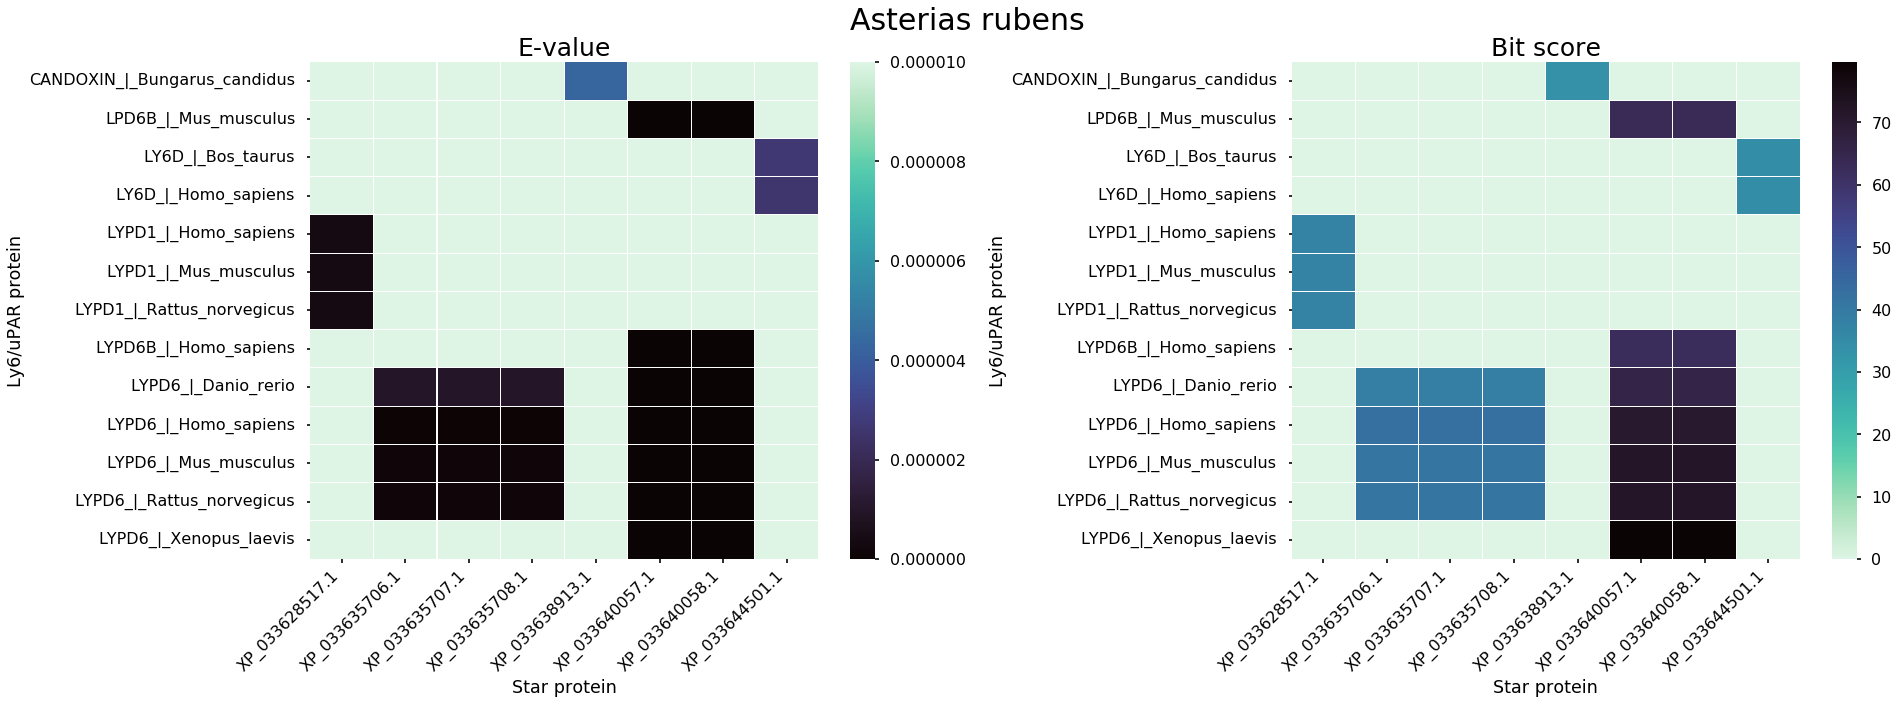

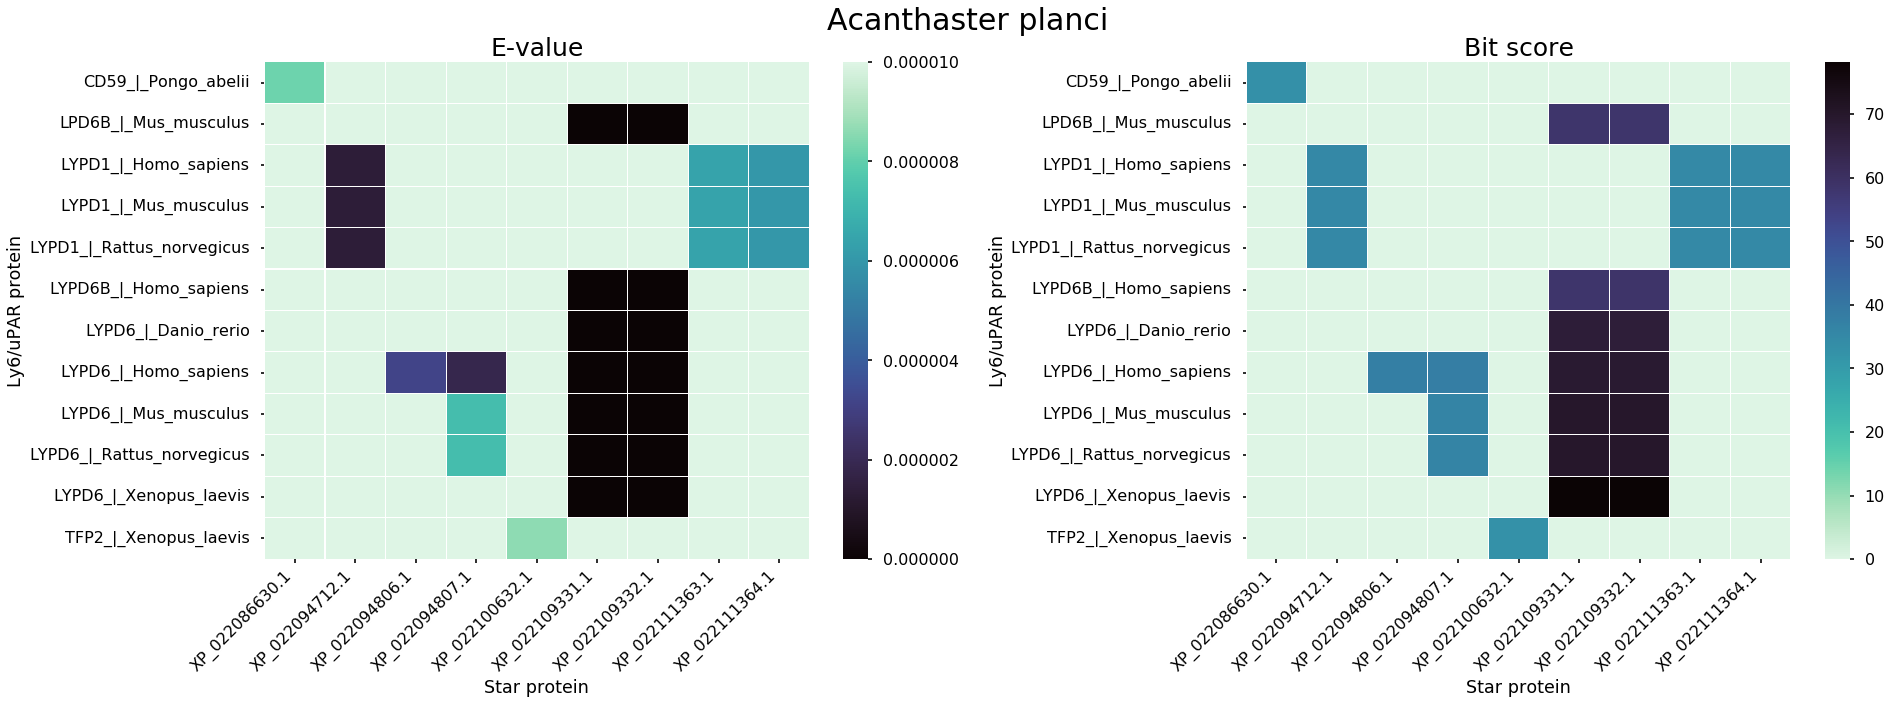

In [12]:
print_heatmap('blast/arubens_blast_short.txt', organism='Asterias rubens')
print_heatmap('blast/aplanci_blast_short.txt', organism='Acanthaster planci')

## Plot alignments

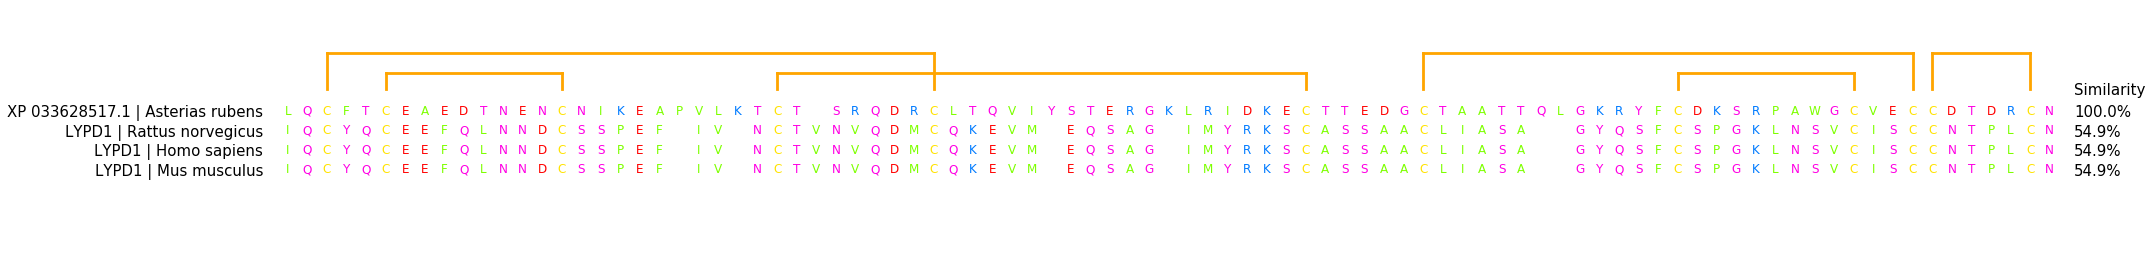

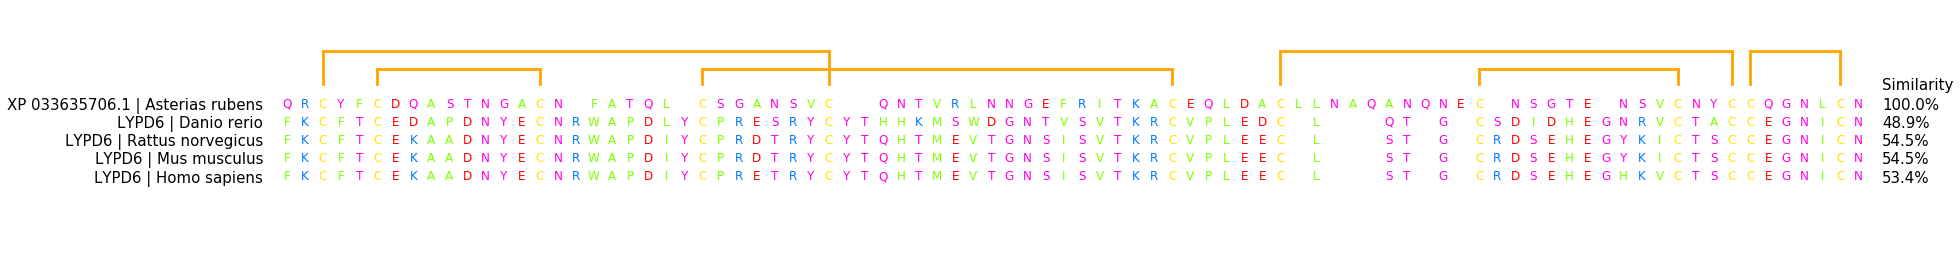

XP_033635707.1 protein has duplicated domain
 "None of [Index(['XP_033635707.1_|_Asterias_rubens'], dtype='object', name='genes')] are in the [index]"
XP_033635708.1 protein has duplicated domain
 "None of [Index(['XP_033635708.1_|_Asterias_rubens'], dtype='object', name='genes')] are in the [index]"


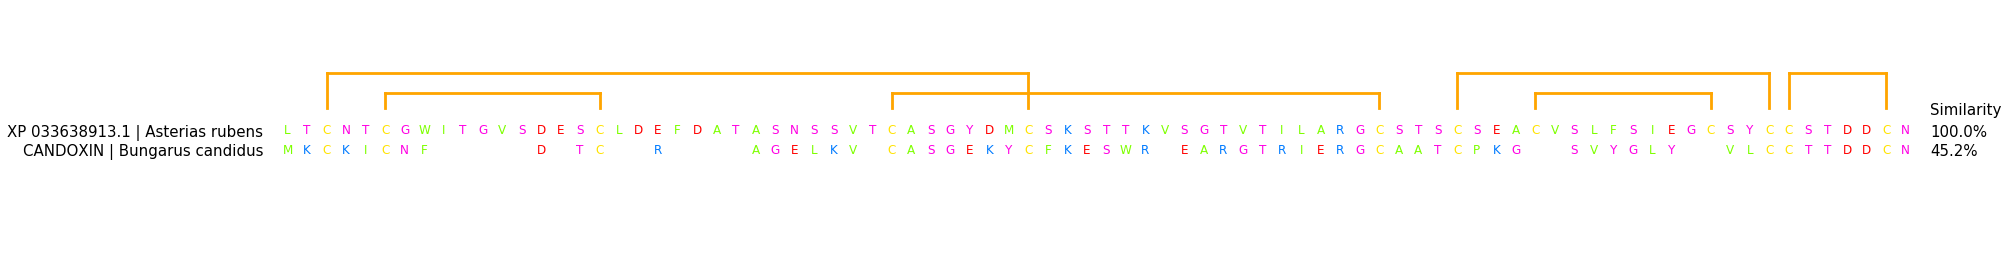

In [ ]:
organism = 'Asterias rubens'
df = get_genes_for_point_aln('arubens')
get_pictures(star_blast=aru, df=df, uniprot=short, organism=organism, color_symbols=True)
get_pictures(star_blast=aru, df=df, uniprot=short, organism=organism, color_symbols=False)

In [ ]:
organism = 'Acanthaster planci'
df = get_genes_for_point_aln('aplanci')
get_pictures(star_blast=apl, df=df, uniprot=short, organism=organism, color_symbols=True)
get_pictures(star_blast=apl, df=df, uniprot=short, organism=organism, color_symbols=False)

# Get dataset for ITOL

In [ ]:
mapper_color_itol = {
    'Amphibia': '\trange\t#e7ffac\tAmphibia\n',
    'Actinopterygii': '\trange\t#c4faf8\tActinopterygii\n',
#     'Cytotoxins': '\trange\t#b5b9ff\tCytotoxins\n',
#     'MT family': '\trange\t#ffb5e8\tMT family\n',
    'Mammalia': '\trange\t#fbe4ff\tMammalia\n',
    'Toxins': '\trange\t#fff5ba\tToxins\n',
    'Insecta': '\trange\t#cfe2f3\tInsecta\n',
    'Lystar proteins' : '\trange\t#ff4b4b\tLystar proteins\n',
#     'Fasciculins': '\trange\t#dcd3ff\tFasciculins\n',
    'Aves': '\trange\t#ffcbc1\tAves\n',
    'Parasites': '\trange\t#ffffff\tParasite of humans\n'
}

In [ ]:
mapper_tax_itol = {
    'Schistosoma mansoni': 'Parasites',
    'Homo sapiens': 'Mammalia',
    'Dendroaspis angusticeps': 'Toxins',
    'Aneides lugubris': 'Amphibia',
    'Macaca mulatta': 'Mammalia',
    'Naja oxiana': 'Toxins',
    'Rattus norvegicus': 'Mammalia',
    'Naja kaouthia': 'Toxins',
    'Laticauda semifasciata': 'Toxins',
    'Danio rerio': 'Actinopterygii',
    'Oryctolagus cuniculus': 'Mammalia',
    'Sus scrofa': 'Mammalia',
    'Mus musculus': 'Mammalia',
    'Dendroaspis polylepis polylepis': 'Toxins',
    'Bos taurus': 'Mammalia',
    'Gallus gallus': 'Aves',
    'Saimiri sciureus': 'Mammalia',
    'Xenopus laevis': 'Amphibia',
    'Micrurus altirostris': 'Toxins',
    'Bungarus candidus': 'Toxins',
    'Laticauda colubrina': 'Toxins',
    'Lithobates sylvaticus': 'Amphibia',
    'Callithrix sp.': 'Mammalia',
    'Dendroaspis jamesoni kaimosae': 'Toxins',
    'Aotus trivirgatus': 'Mammalia',
    'Papio sp.': 'Mammalia',
    'Canis lupus familiaris': 'Mammalia',
    'Naja atra': 'Toxins',
    'Saimiriine herpesvirus 2 (strain 11)': 'Parasites',
    'Micrurus mipartitus': 'Toxins',
    'Saimiri boliviensis boliviensis': 'Mammalia',
    'Macaca fascicularis': 'Mammalia',
    'Batrachuperus londongensis': 'Amphibia',
    'Boiga irregularis': 'Toxins',
    'Pan troglodytes': 'Mammalia',
    'Notophthalmus viridescens': 'Amphibia',
    'Oryzias latipes': 'Actinopterygii',
    'Drosophila melanogaster': 'Insecta',
    'Cynops orientalis': 'Amphibia',
    'Bungarus multicinctus': 'Toxins',
    'Chlorocebus aethiops': 'Mammalia',
    'Nilaparvata lugens': 'Insecta',
    'Ophiophagus hannah': 'Toxins',
    'Boiga dendrophila': 'Toxins',
    'Pongo abelii': 'Mammalia',
    'Naja pallida': 'Toxins',
    'Plethodon shermani': 'Amphibia',
    'Meleagris gallopavo': 'Aves',
    'Schistosoma mansoni': 'Parasites',
    'Asterias rubens': 'Lystar proteins',
    'Acanthaster planci': 'Lystar proteins',  
}
set(short.org.unique()) - set(mapper_tax_itol), set(mapper_tax_itol) - set(short.org.unique())

In [ ]:
labels = [i.split('\t')[2].strip() for i in mapper_color_itol.values()]
colors = [i.split('\t')[3].strip() for i in mapper_color_itol.values()]

In [ ]:
with open('result/range_colors_all.txt', 'w') as f:
    f.write('TREE_COLORS\nSEPARATOR TAB\n')
    f.write('LEGEND_TITLE\tAnnotation\n')
    f.write('LEGEND_COLORS\t' + '\t'.join(colors) + '\n')
    f.write('LEGEND_LABELS\t' + '\t'.join(labels) + '\n')
    f.write('DATA\n')
    for i, j in short.iterrows():
        if 'strain 11' in j.org:
            continue
        f.write(j.id + mapper_color_itol[mapper_tax_itol.get(j.org)])
    for i, j in aru.iterrows():
        f.write(i + mapper_color_itol[mapper_tax_itol.get(j.org)])
    for i, j in apl.iterrows():
        f.write(i + mapper_color_itol[mapper_tax_itol.get(j.org)])